In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [29]:
raw_data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

In [30]:
data = raw_data

In [31]:
data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [32]:
data['toothed'] = data['toothed'].map({'False' : 0,'True' : 1})
data['hair'] = data['hair'].map({'False' : 0,'True' : 1})
data['breathes'] = data['breathes'].map({'False' : 0,'True' : 1})
data['legs'] = data['legs'].map({'False' : 0,'True' : 1})
data['species'] =  data['species'].map({'Mammal' : 1,'Reptile' : 0})

In [33]:
data

,toothed,hair,breathes,legs,species
0,1,1,1,1,1
1,1,1,1,1,1
2,1,0,1,0,0
3,0,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1
6,1,0,0,0,0
7,1,0,1,0,0
8,1,1,1,1,1
9,0,0,1,1,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   toothed   10 non-null     int64
 1   hair      10 non-null     int64
 2   breathes  10 non-null     int64
 3   legs      10 non-null     int64
 4   species   10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes


In [39]:
features = data.iloc[:,:-1]
target = data.iloc[:,-1]

In [41]:
tree_1 = DecisionTreeClassifier()
tree_1.fit(features,target)

DecisionTreeClassifier()

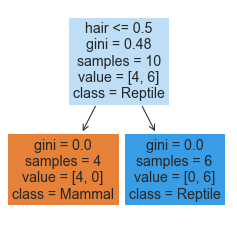

In [50]:
plt.figure(figsize = (4,4))
tree_1_fig = plot_tree(tree_1, feature_names = features.columns, class_names = ['Mammal','Reptile'], filled = True, precision = 4)

In [51]:
tree_2 = DecisionTreeClassifier(criterion = 'entropy')
tree_2.fit(features,target)

DecisionTreeClassifier(criterion='entropy')

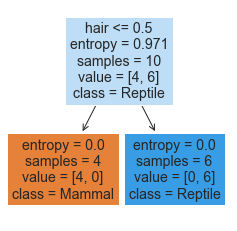

In [54]:
plt.figure(figsize = (4,4))
tree_2_fig = plot_tree(tree_2, feature_names = features.columns, class_names = ['Mammal','Reptile'], filled = True, precision = 4)

In [53]:
new_features = features.drop(columns = 'hair')

In [55]:
tree_3 = DecisionTreeClassifier()
tree_3.fit(new_features,target)

DecisionTreeClassifier()

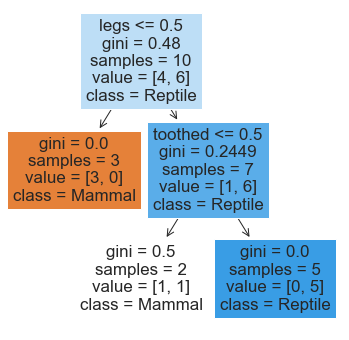

In [57]:
plt.figure(figsize = (6,6))
tree_3_fig = plot_tree(tree_3, feature_names = new_features.columns, class_names = ['Mammal','Reptile'], filled = True, precision = 4)

In [67]:
iris = sns.load_dataset('iris')

In [68]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [70]:
le = LabelEncoder()
y = le.fit_transform(y)

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [78]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred = tree.predict(x_test)

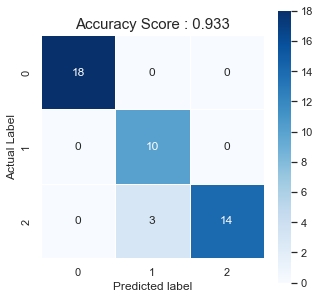

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(data = cm,linewidths = 0.5, annot = True, square = True, cmap = 'Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
test_acc = 'Accuracy Score : {0:1.3f}'.format(accuracy_score(y_test, y_pred))
plt.title(test_acc, fontsize = 15)
plt.show()

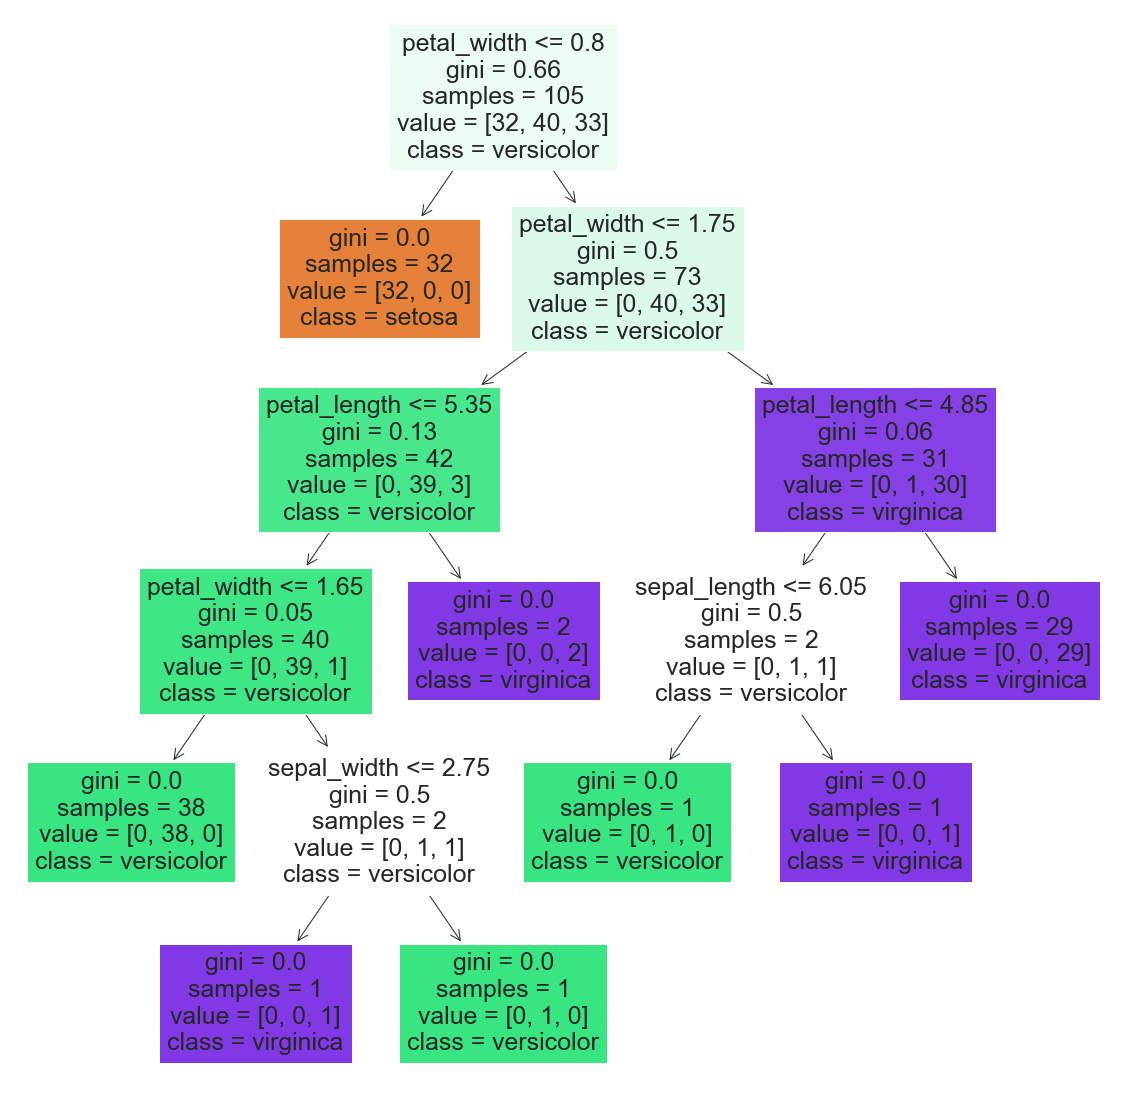

In [92]:
plt.figure(figsize = (20,20))
tree_fig = plot_tree(tree, feature_names = x.columns, class_names = ['setosa','versicolor','virginica'], precision = 2, filled = True)

In [95]:
path = tree.cost_complexity_pruning_path(x_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00921659, 0.00928571, 0.0344898 , 0.2729283 ,
        0.31879725]),
 'impurities': array([0.        , 0.01843318, 0.03700461, 0.0714944 , 0.3444227 ,
        0.66321995])}

In [96]:
alphas = path['ccp_alphas']
impurities = path['impurities']

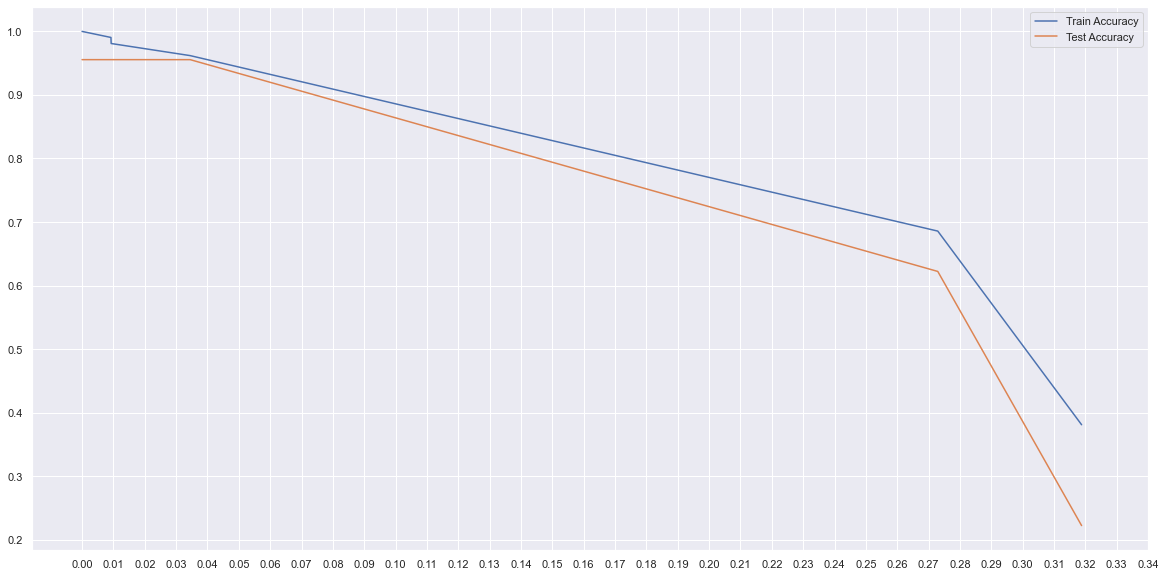

In [102]:
accuracy_train, accuracy_test = [],[]

for i in alphas:
    new_tree = DecisionTreeClassifier(ccp_alpha = i)
    
    new_tree.fit(x_train,y_train)
    y_train_pred = new_tree.predict(x_train)
    y_test_pred = new_tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
plt.figure(figsize = (20,10))
sns.lineplot(y = accuracy_train, x = alphas, label = 'Train Accuracy')
sns.lineplot(y = accuracy_test, x = alphas, label = 'Test Accuracy')
plt.xticks(ticks = np.arange(0.00,0.35,0.01))
plt.show()

The model has a better training and test accuracy at an alpha range of 0.03 to 0.04. <br>
Although the training accuracy has decreased the model will perform much better on unseen data with this alpha value.

Train Accuracy : 0.96
Test Accuracy : 0.96


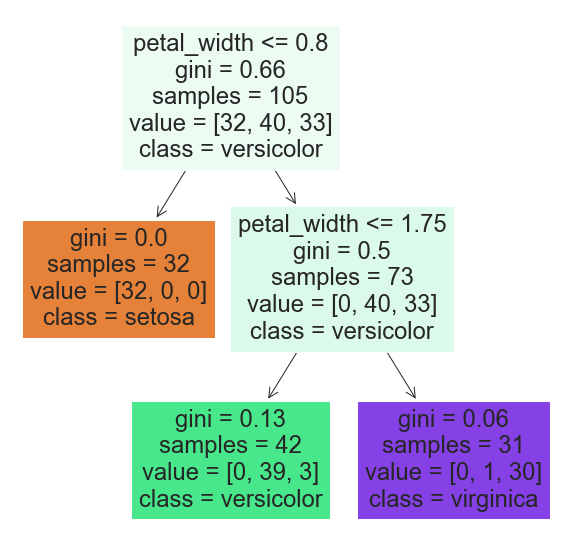

In [108]:
tree_4 = DecisionTreeClassifier(ccp_alpha = 0.035)
tree_4.fit(x_train,y_train)

y_train_pred = tree_4.predict(x_train)
y_test_pred = tree_4.predict(x_test)

print(f'Train Accuracy : {accuracy_score(y_train, y_train_pred):1.2f}')
print(f'Test Accuracy : {accuracy_score(y_test, y_test_pred):1.2f}')

fig = plt.figure(figsize =(10,10))
tree_4_fig = plot_tree(tree_4, feature_names = x.columns, class_names = ['setosa','versicolor','virginica'], filled = True, precision = 2)

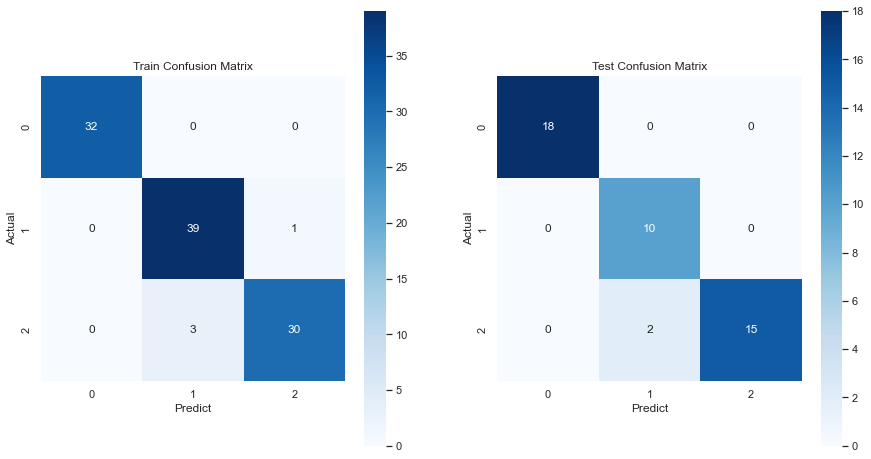

In [111]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))

sns.heatmap(data = confusion_matrix(y_train, y_train_pred), annot = True, square = True, ax = ax1, cmap = 'Blues')
ax1.set_title('Train Confusion Matrix')
ax1.set_xlabel('Predict')
ax1.set_ylabel('Actual')

sns.heatmap(data = confusion_matrix(y_test, y_test_pred), annot = True, square = True, ax = ax2, cmap = 'Blues')
ax2.set_title('Test Confusion Matrix')
ax2.set_xlabel('Predict')
ax2.set_ylabel('Actual')

plt.show()

In [120]:
text_representation = export_text(tree_4, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(text_representation)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- class: 1
|   |--- petal_width >  1.75
|   |   |--- class: 2

